In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd

In [2]:
# Define sigmoid function

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [3]:
# Sigmoid over set of values

values = [-3, -2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5, 3]
print([sigmoid(value) for value in values])

[0.04742587317756678, 0.07585818002124355, 0.11920292202211755, 0.18242552380635635, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8175744761936437, 0.8807970779778823, 0.9241418199787566, 0.9525741268224334]


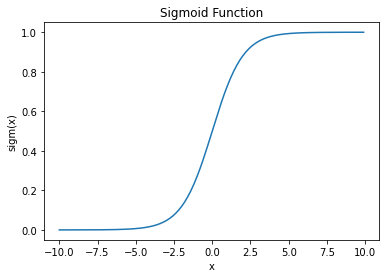

In [4]:
# Plot sigmoid function -10 to 10 with matplotlib
values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigm(x)')
plt.title('Sigmoid Function')
plt.show()

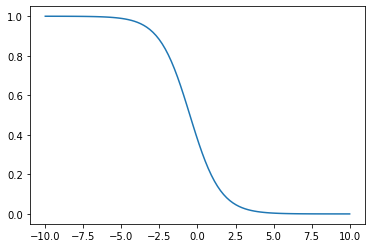

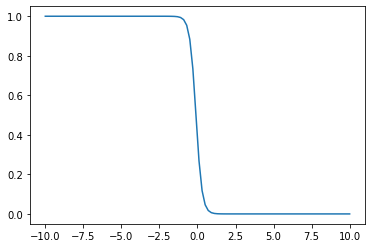

In [5]:
# Define sigmoid with weight and bias.

def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

sigmoid(1, 0.5, 0)

w = -1
b = -0.5  
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

# Observe how changing the weight affects the curve slope (gradient)
w = -5
b = -0.5  
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

SHAPE :  (100,) (100,) (100, 100) (100, 100)


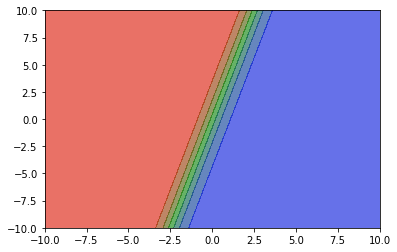

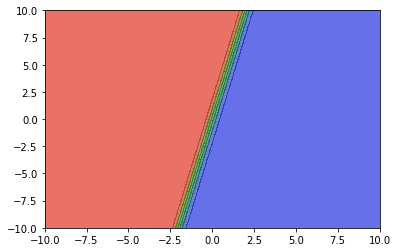

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

sigmoid_2d(1, 0, 0.5, 0, 0)

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print("SHAPE : ", X1.shape, X2.shape, XX1.shape, XX2.shape)

w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])

plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()


# Observe changes.

w1 = 5
w2 = -1
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])

plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

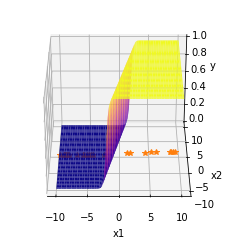

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='plasma')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 270)

# Compute Loss for a Given Dataset

w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X, Y, '*')
plt.show()

In [8]:
# Function to calculate loss
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss


62 25
0.5 0.24


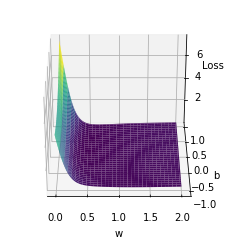

In [9]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

WW.shape

for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

print(i, j)

print(WW[i, j], BB[i, j])


In [10]:
# Class for Sigmoid Neuron

class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

In [11]:
# Fit for toy data - Points and their classes are given
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5], [4, 3], [-1, -4], [2, 2], [-2, 3]])
Y = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]

sn = SigmoidNeuron()
sn.fit(X, Y, 5, 0.25, True)

In [12]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap='plasma', alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap='plasma')
  ax.plot()


[[-1.83384865  0.32932161]] [-0.01157501]
[[-1.63766643  0.47065402]] [-0.13147995]
[[-1.36941485  0.62542414]] [-0.25995435]
[[-0.99946124  0.81892416]] [-0.29464345]
[[-0.39500546  1.17719428]] [-0.14615254]
[[-0.10379622  1.14791112]] [-0.1298753]
[[0.34551122 0.97865247]] [-0.13311302]
[[0.85249923 0.66363752]] [-0.17522141]
[[1.05764829 0.22873377]] [-0.20635845]
[[ 1.11711846 -0.2648588 ]] [-0.20099288]
[[ 1.21035617 -0.20766889]] [-0.29201991]
[[ 1.24718931 -0.32679109]] [-0.3728368]
[[ 1.34172302 -0.21603492]] [-0.44544823]
[[ 1.35808748 -0.37751946]] [-0.51376328]
[[ 1.45356565 -0.23177943]] [-0.57312122]
[[ 1.46035436 -0.40459795]] [-0.63283729]
[[ 1.54611414 -0.26680522]] [-0.68256568]
[[ 1.5549987  -0.40669719]] [-0.73430888]
[[ 1.62228501 -0.31198848]] [-0.77668383]
[[ 1.63955046 -0.39766482]] [-0.82041232]
[[ 1.68850369 -0.35268848]] [-0.85749546]
[[ 1.71330941 -0.39321598]] [-0.89460022]
[[ 1.75005616 -0.38135293]] [-0.92789999]
[[ 1.77799364 -0.39802004]] [-0.96023757]


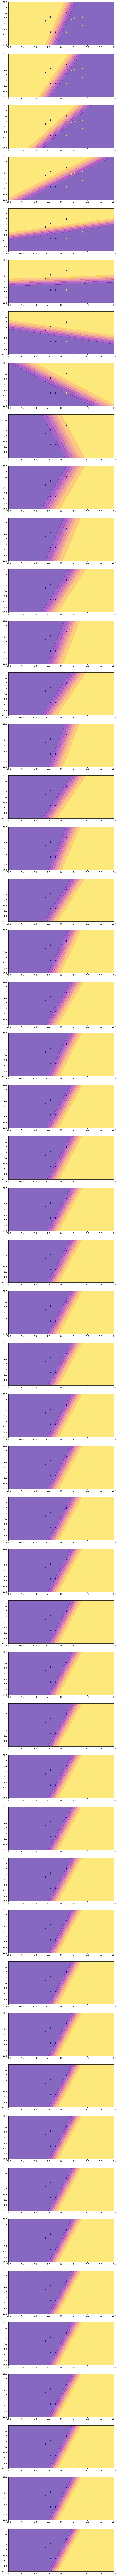

In [13]:
sn.fit(X, Y, 1, 0.05, True)

# Number of epoch
N = 50
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)